In [ ]:
!pip install ucimlrepo
!pip install scikit-learn pandas matplotlib seaborn

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Load Car Evaluation dataset (ID 19 on UCI)
car_evaluation = fetch_ucirepo(id=19)

# Combine features and target into one DataFrame
df = pd.concat([car_evaluation.data.features, car_evaluation.data.targets], axis=1)

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

# Convert each categorical column to numeric
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [ ]:
X = df.drop('class', axis=1)
y = df['class']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
pd.DataFrame(X_train).to_csv("processed_train.csv", index=False)
pd.DataFrame(X_test).to_csv("processed_test.csv", index=False)
pd.DataFrame(y_train).to_csv("train_labels.csv", index=False)
pd.DataFrame(y_test).to_csv("test_labels.csv", index=False)

In [ ]:
from google.colab import files

files.download('processed_train.csv')
files.download('processed_test.csv')
files.download('train_labels.csv')
files.download('test_labels.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Gimhan

In [ ]:
# Load Libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt



In [ ]:
# Load pre processed data
# iris = load_iris()
# X = iris.data
# y = iris.target

# # Train Test Split
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# Create and train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

In [ ]:
# Make predictions
y_pred = nb_model.predict(X_test)

Accuracy: 0.6358381502890174

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.06      0.12        77
           1       0.00      0.00      0.00        14
           2       0.84      0.83      0.84       242
           3       0.14      1.00      0.24        13

    accuracy                           0.64       346
   macro avg       0.38      0.47      0.30       346
weighted avg       0.71      0.64      0.62       346



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


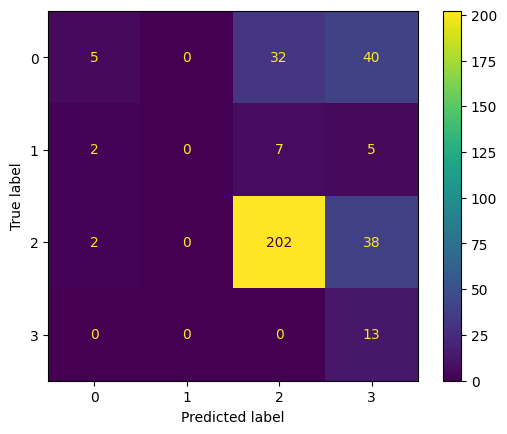

In [ ]:
# Evaluate Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()